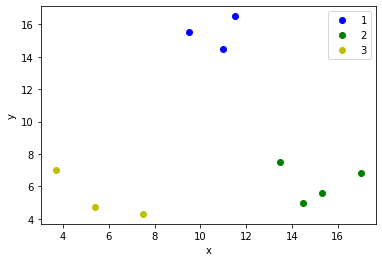

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

x = [11.5, 9.5, 11, 13.5, 17, 15.3, 14.5, 3.7, 5.4, 7.5]
y = [16.5, 15.5, 14.5, 7.5, 6.8, 5.6, 5, 7, 4.7, 4.3]

df = pd.DataFrame(x, columns=['x'])
df['y'] = y
#print(df)
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
df['cluster'] = kmeans.labels_


#for i, txt in enumerate(zip(x, y)):
#    plt.annotate(txt, (x[i], y[i]))



plt.plot(df[df['cluster']==0]['x'], df[df['cluster']==0]['y'], 'bo', label='1')
plt.plot(df[df['cluster']==1]['x'], df[df['cluster']==1]['y'], 'go', label='2')
plt.plot(df[df['cluster']==2]['x'], df[df['cluster']==2]['y'], 'yo', label='3')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0)
plt.show()


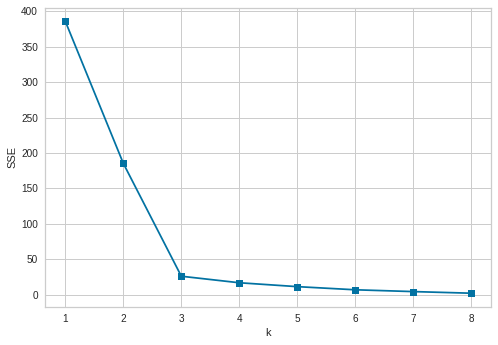

In [26]:
SSE = []
n = 9

for k in range(1,n):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)


plt.plot(range(1,n), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()


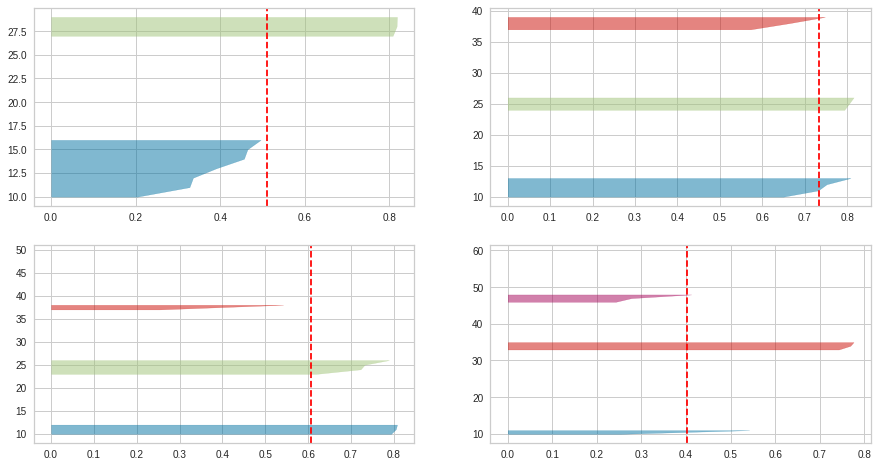

In [34]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)